# Introduction

I recently got a FitBit Inspire 2 as a gift and started using it to track my overall activity throughout the day. In recently starting a new job as night shift worker, I was curious to see any trends in my activity over 1 month, such as steps taken, calories burned, distance walked, heart rate and sleeping time, so I gathered the following data using FitBit's API. 

Note, that these were the only metrics I decided to keep track of as FitBit allows you to track workouts and food as well. 

The overall goal of this analysis is to:
1. Practice using an API (first time)
2. Graph and depict statistical graphs
3. Undercover any underlying trends/insights (Am I getting enough sleep? activity?)


In [1]:
# Libraries we'll be using
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Read in the data

In [2]:
df = pd.read_csv("data.csv", index_col=0)
df

,steps,calories,distance (mi),avg_hr,sleep (min)
2021-02-09,5992.0,2481.0,4.25616,64.359972,461.0
2021-02-10,5970.0,2354.0,4.26071,59.799853,437.0
2021-02-11,9919.0,2684.0,7.44530,60.938746,445.0
2021-02-12,5425.0,2316.0,3.87178,59.836053,506.0
2021-02-13,5364.0,2423.0,3.82788,61.930985,449.0
2021-02-14,5436.0,2336.0,3.87967,59.415000,478.0
2021-02-15,5674.0,2323.0,3.98395,60.331727,370.0
2021-02-16,4556.0,2203.0,3.25164,59.448885,464.0
2021-02-17,7144.0,2481.0,5.08296,62.208933,385.0
2021-02-18,6729.0,2442.0,4.80257,63.319785,413.0


We can see that the last row has null values for 3/4 of the columns. For this analysis, we are only interested the data from February 9th to March 9th. So, we can go ahead and **drop the last row.**

In [3]:
df.drop(df.tail(1).index, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 2021-02-09 to 2021-03-09
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   steps          29 non-null     float64
 1   calories       29 non-null     float64
 2   distance (mi)  29 non-null     float64
 3   avg_hr         29 non-null     float64
 4   sleep (min)    29 non-null     float64
dtypes: float64(5)
memory usage: 1.4+ KB


Next, let's **round** the distance walked and the average heart rate to **2 decimal places.**

In [5]:
df["distance (mi)"] = df["distance (mi)"].round(2)
df["avg_hr"] = df["avg_hr"].round(2)

Also, we see that the time I slept is displayed in minutes and this is somewhat hard to decipher. **Let's convert it to hours.**

In [6]:
df["sleep (min)"] = round(df["sleep (min)"] / 60, 2)
df.rename({"sleep (min)":"sleep (hr)"}, axis=1, inplace=True)

## My Sleep Distribution

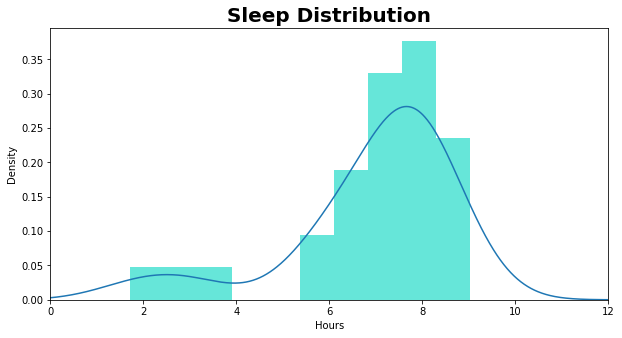

In [7]:
fig = plt.figure(figsize=(10,5))

# Plotting kernel density estimate plot
df["sleep (hr)"].plot.kde()
# Plotting the histogram
plt.hist(df["sleep (hr)"], density=True, color="turquoise", alpha=0.8)

# Setting the x axis limits
plt.xlim(0, 12)

# Title and axis labels
plt.title("Sleep Distribution",
          fontdict={"fontsize":20, "fontweight":"bold"})
plt.xlabel("Hours")

plt.show()

From the kernel density plot above, we can see that my sleep has a bimodal distribution (the 2 humps). Given the rather small portion of data, I know there were days where I only had 2-3 hours of sleep. This is because I work graveyard shift and I usually sleep during the day, but on somedays I sacrificed my sleep for certain occassions.

## Amount of sleep over time

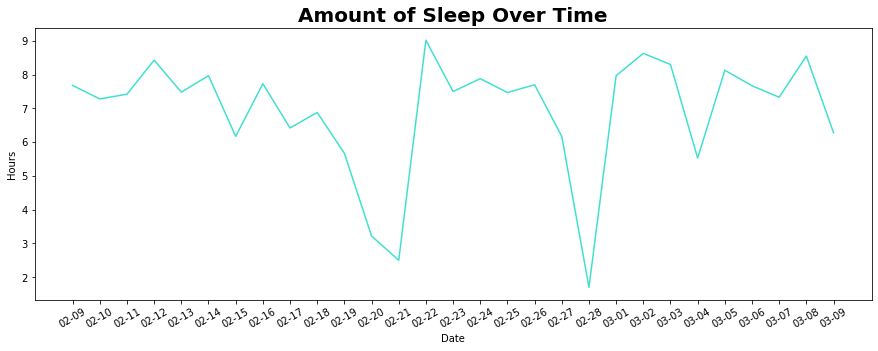

In [8]:
fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot()

# Manually getting the x-ticks
dates = pd.date_range(start="2021-02-09", end="2021-03-09", freq="D").strftime("%m-%d")

# Plotting the amount of sleep over time
ax.plot(df["sleep (hr)"], color="turquoise")

# Setting the x-ticks to dates
ax.set_xticklabels(dates)

# Fix position of x-ticks
plt.xticks(rotation=30)

# Title
plt.title("Amount of Sleep Over Time",
          fontdict={"fontsize":20, "fontweight":"bold"})

# Axis labels
plt.xlabel("Date")
plt.ylabel("Hours")
plt.tick_params(labelsize=10)




## Daily Steps Distribution

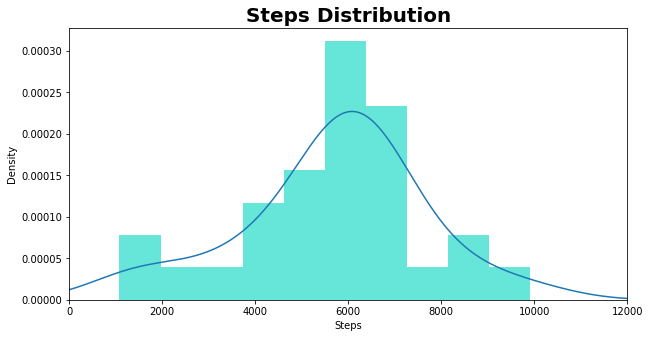

In [9]:
fig = plt.figure(figsize=(10,5))


# Plotting the kernel density estimate
df["steps"].plot.kde()
# Plotting the histogram
plt.hist(df["steps"], density=True, color="turquoise", alpha=0.8)

# Setting the x-axis limits
plt.xlim(0, 12000)

# Title and x-axis label
plt.title("Steps Distribution",
          fontdict={"fontsize":20, "fontweight":"bold"})
plt.xlabel("Steps")

plt.show()

## Findings

We can see that my steps taken follow a normal distribution around 6000 steps. It is recommended for an average adult to take at least 10000 steps everyday to stay healthy...looks like I have some work to do! Side note, I have been recovering from some injuries and this may constitute to my lack of daily steps. 

Let's look at the days I am most active. First let's see how many days of each day we have in the data (Monday, Tuesday, etc.)

In [10]:
s = pd.to_datetime(df.index).to_series()
s_dow = s.dt.dayofweek # Returns number 0-6 based on the day

# Mapping the number to the name of day
dow_map = {0: "Monday",
           1: "Tuesday",
           2: "Wednesday",
           3: "Thursday",
           4: "Friday",
           5: "Saturday",
           6: "Sunday"}

# Creating a new column
df["dow"] = s_dow
# Changing the new column to the day names
df["dow"] = df["dow"].map(dow_map)

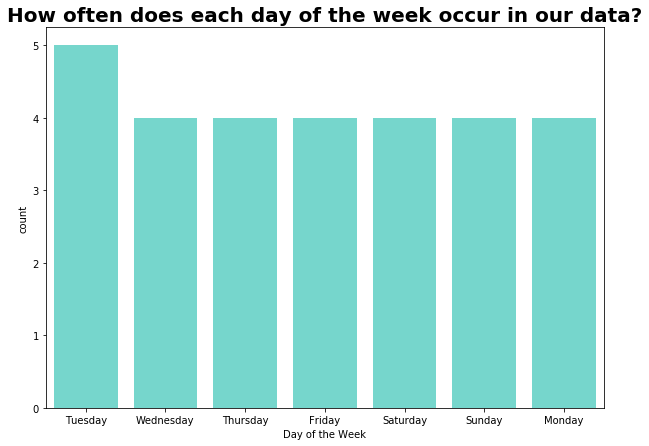

In [11]:
import seaborn as sns

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot()

# Counting how many occurrences of each day
sns.countplot(x="dow", data=df, color="turquoise", alpha=0.8)

# Setting x-axis label
plt.xlabel("Day of the Week")

# Title
plt.title("How often does each day of the week occur in our data?", 
          fontdict={"fontsize":20, "fontweight":"bold"})

plt.show()

It seems like we have 1 extra data point for Tuesday since we pulled the data to the 2nd Tuesday of March.

## Am I more active on the weekdays or weekends?
We'll constitute more active as just taking more steps throughout 1 day.

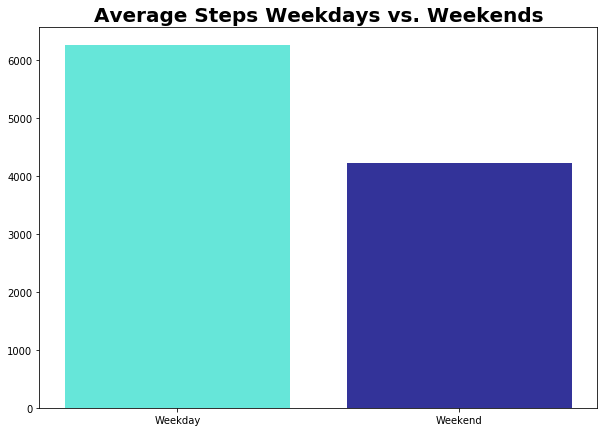

In [12]:
# Mapping which days are weekdays vs. weekends
week = {"Monday": "Weekday",
        "Tuesday": "Weekday",
        "Wednesday": "Weekday",
        "Thursday": "Weekday",
        "Friday": "Weekday",
        "Saturday": "Weekend",
        "Sunday": "Weekend"}

# Creating new column for weekend or weekday
df["day_or_end"] = df["dow"].map(week)

# Finding the mean steps for weekday and weekend
g = df.groupby(["day_or_end"])
g_mean = g.mean()

## Plotting the mean for weekday and weekend
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot()

# Bar plot
plt.bar(x = g_mean.index, 
        height = g_mean["steps"], 
        color = ["turquoise","navy"], 
        alpha = 0.8)

# Title
plt.title("Average Steps Weekdays vs. Weekends", 
          fontdict={"fontsize":20, "fontweight":"bold"})

plt.show()

## Findings

We can see that on average, I am **more active on weekdays** compared to the weekends by about 2,000 steps. Is this difference statistically significant? Generally, statisticians recommend having at least 100 data points to determine this through a t-test. So, we need more data!

## Overview of Correlation

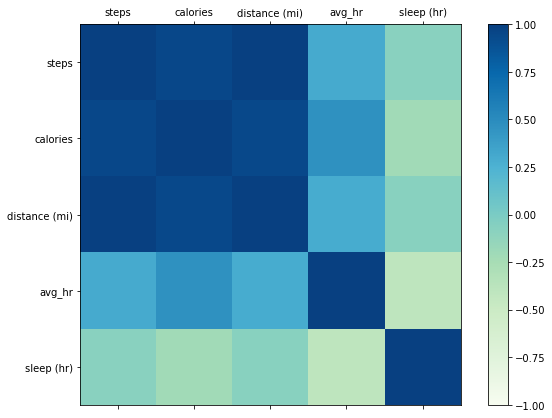

In [13]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot()

# Change to color of heat map
cmap = plt.get_cmap("GnBu")


# Plotting the heatmap
bar = ax.matshow(df.corr(), vmin=-1, vmax=1, cmap=cmap)

# Adding the gradient bar on the right side
fig.colorbar(bar)

# Changing the xticks and yticks
ax.set_xticks(np.arange(0,5,1))
ax.set_xticklabels(df.columns)
ax.set_yticks(np.arange(0,5,1))
ax.set_yticklabels(df.columns)


plt.show()

## Findings
From the correlation plot above, we can see that steps, calories burned, and distance walked are strongly correlated, as expected. 

Average heart rate has a weak positive correlation with steps, calories, and distance and a weak negative correlation with sleep. In other words, the lower the heart rate, the more sleep I get. 

Sleep has a weak negative correlation with all variables. **Let's visualize this to see if there is an actual linear relationship with steps.** 

## Outliers from steps and hours slept

To see if there is a linear relationship between steps and hours, we must first remove any outliers as these may skew our line of best fit.

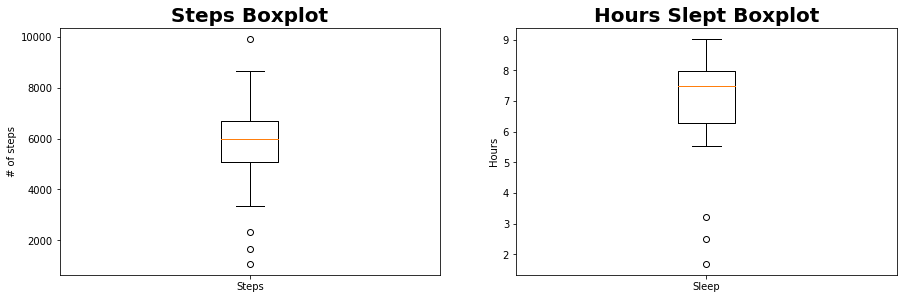

In [14]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(221)
ax1 = fig.add_subplot(222)

# Plotting the steps boxplot
ax.boxplot(x=df["steps"], labels=["Steps"])
# Setting the y-axis label
ax.set_ylabel("# of steps")
# Title for plot 1
ax.set_title("Steps Boxplot",
             fontdict={"fontsize":20, "fontweight":"bold"})



# Plotting the hours slept boxplot
ax1.boxplot(x=df["sleep (hr)"], labels=["Sleep"])
# Setting the y-axis labels
ax1.set_ylabel("Hours")
# Title for plot 2
ax1.set_title("Hours Slept Boxplot", 
              fontdict={"fontsize":20, "fontweight":"bold"})
plt.show()


From the box and whisker plots above, we are only going to foucs on the 3 steps outliers because I know there were some days where I did not wear my FitBit device for a long period of time. So these values are not an accurate representation of my daily steps. 

We are going to keep the hours slept outliers because there were actual days where I only got little sleep due to my night schedule shift mentioned before. I want this relationship to be fully representative of my routine. 

So, let's drop the 3 steps outliers. 

In [15]:
outliers = df[df["steps"] < 3000].index # 3 outliers according to the boxplot
new_df = df.drop(outliers)
new_df.shape # Confirm changes

(26, 7)

## Is there a linear relationship between sleep and steps?

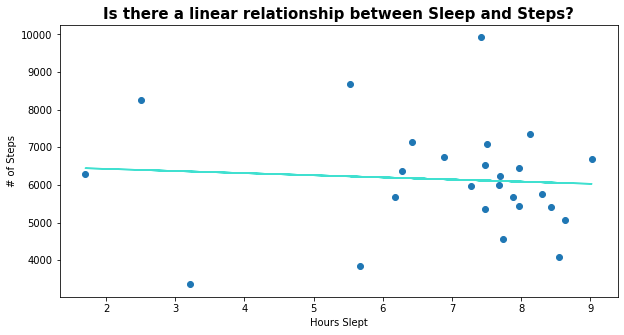

In [16]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()

# Scatter plot of sleep vs. steps
plt.scatter(new_df["sleep (hr)"], new_df["steps"])

# Getting the slope and y intercept for line of best fit
m, b = np.polyfit(new_df["sleep (hr)"], 
                  new_df["steps"], 1)

# Plotting line of best fit
plt.plot(new_df["sleep (hr)"], 
         m*(new_df["sleep (hr)"]) + b,
         color="turquoise")

# Axis labels
plt.xlabel("Hours Slept")
plt.ylabel("# of Steps")

# Title
plt.title("Is there a linear relationship between Sleep and Steps?", 
          fontdict={"fontsize":15, "fontweight":"bold"})

plt.show()


## Findings
From the graph above, we can see that the line of best fit is almost horizontal, which means that there is no linear relationship between hours slept and daily steps taken. 

In other words, the hours I sleep does not predict the steps I take for the given day. 

# Conclusion

In summary, I gathered my personal FitBit data through their API, visualized it using matplotlib and seaborn, and explored the linear relationship between hours slept and steps taken. I found that I generally take 6000 steps everyday, in which I need to improve. I am more active on the weekdays compared to weekends, but the statistical significance cannot be determined due to the lack of data. Lastly, there is little to no linear relationship between hours slept and steps taken, meaning that the amount I sleep does not predict the amount of steps I take the next day. 

Moving forward, I am going to gather more data for the same metrics so I can run t-tests and linear models to see if they is a statisical significance and I can predict my activity based on my routine. Also, once I recover from my injury, I will gather data from my runs and explore any improvements in heart rate, cadence, etc. (I love running!!!) 

The purpose of this project was to familiarize myself with the workflow of working with an API, practice statistical concepts, and practice data visualization. If you have any questions or suggestions, I would love to hear them! Thanks for reading. 